# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [3]:
print(df.shape)
df.describe()

(804, 12)


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df = df.drop_duplicates()
df.shape

(804, 12)

In [6]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

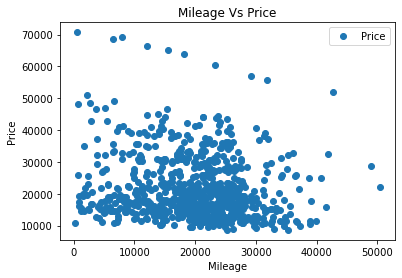

In [7]:
df.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage Vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [8]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [9]:
X = df.loc[:, ['Mileage']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [10]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [11]:
print(regressor.intercept_) # c
print(regressor.coef_) # slope - m

# Price  = -0.15679917 * (Mileage) + 24464.09653703741

24464.09653703741
[-0.15679917]


In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,11045.108844,20611.854498
1,12045.920705,21463.587596
2,14703.136868,20805.187876
3,15053.933735,23734.666792
4,12553.071428,19314.184557
...,...,...
156,44084.914212,21113.768645
157,10106.016431,22237.548306
158,12828.030977,21472.211551
159,57154.443437,19876.152787


In [14]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.02872584628111652


Text(0.5, 1.0, 'Mileage vs Price')

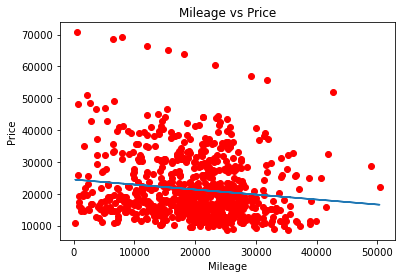

In [15]:

x = df[['Mileage']]# select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Price'].values
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
plt.scatter(x, y, color='r')
plt.plot(x, regressor.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

In [16]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values
y = df['Price'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Mileage,-0.135193
Cylinder,3467.591623
Liter,-425.698169
Doors,-1402.487710
Cruise,6219.092563
Sound,-1819.145266
Leather,3399.941359


In [20]:
regressor.intercept_ # c 

5983.744090102275

In [21]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,11045.108844,19860.650756
1,12045.920705,15106.338755
2,14703.136868,20963.008072
3,15053.933735,23283.569214
4,12553.071428,19472.203322
...,...,...
156,44084.914212,30599.262835
157,10106.016431,17862.392200
158,12828.030977,21332.866942
159,57154.443437,32805.426538


In [22]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4645408706309192


In [23]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [24]:
def lin_reg_wrt_focus(feature, df3, focus='price'):
    input_cols = df[feature]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [25]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [31]:
combos = get_combos(feature)

In [32]:
def all_combo_scores(combos, df3, focus='Price'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df3, focus)] = n
    return combo_scores

In [33]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.446264353672838,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.437805741536638,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),
 (0.4369402151237246, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')),
 (0.43014148406475605,
  ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')),
 (0.43001820483252684, ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')),
 (0.4265348637809263,
  ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4257681327974422, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42482840454267856,
  ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4244182401799875,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')),
 (0.42409748258510394, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')),
 (0.4225307670398466, ('Mileage', 'Cylinder', 'Liter', 'Cruise',